In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
customers = pd.read_csv(r'D:\final project\Dataset\olist_customers_dataset.csv')

orders = pd.read_csv(r'D:\final project\Dataset\olist_orders_dataset.csv', 
                     parse_dates=[
                         'order_purchase_timestamp', 
                         'order_approved_at', 
                         'order_delivered_carrier_date',
                         'order_delivered_customer_date',
                         'order_estimated_delivery_date'
                     ]
                    )

order_items = pd.read_csv(r'D:\final project\Dataset\olist_order_items_dataset.csv', 
                          parse_dates=[
                              'shipping_limit_date'
                          ]
                         )
order_payments = pd.read_csv(r'D:\final project\Dataset\olist_order_payments_dataset.csv')

In [4]:
dfs = [customers, orders, order_items, order_payments]

# Print shape of our datasets
for df in dfs:
    print(df.shape)

(99441, 5)
(99441, 8)
(112650, 7)
(103886, 5)


In [5]:
# Merge 4 datasets into 1 dataframe
df1 = order_items.merge(order_payments, on='order_id')
df2 = df1.merge(orders, on='order_id')
df = df2.merge(customers, on='customer_id')

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [6]:
# Check for null values
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [7]:
df[df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

order_status
shipped        1244
canceled        559
processing      375
invoiced        371
delivered         8
unavailable       7
approved          3
Name: count, dtype: int64

In [8]:
# We will only keep orders that were delivered
df = df[df['order_status']=='delivered']
df.isnull().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [9]:
# Create a dataframe to store customers uuid and recency scores
recency = df[['customer_unique_id', 'order_purchase_timestamp']].copy()

# Since a customer may have more than one order, we will obtain his/her last purchase timestamp
recency = recency.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency.columns = ['customer_unique_id', 'last_purchase_timestamp']

# Calculate the number of days since customers' last purchase
recency['inactive_days'] = (recency['last_purchase_timestamp'].max() - recency['last_purchase_timestamp']).dt.days
recency.drop(columns='last_purchase_timestamp', inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_14572\4225387926.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(recency['inactive_days'], bins=50)


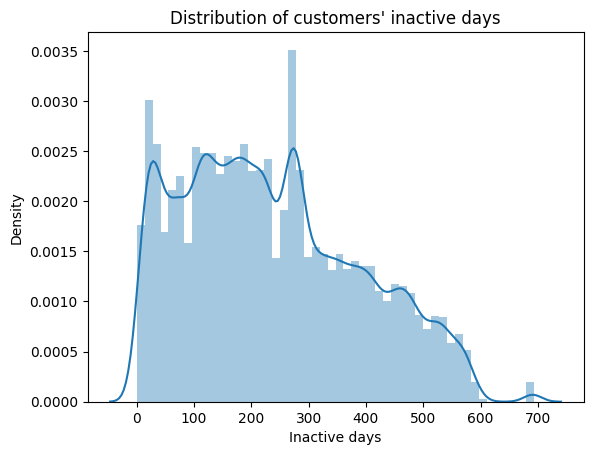

In [10]:
sns.distplot(recency['inactive_days'], bins=50)
plt.xlabel('Inactive days')
plt.ylabel('Density')
plt.title("Distribution of customers' inactive days");

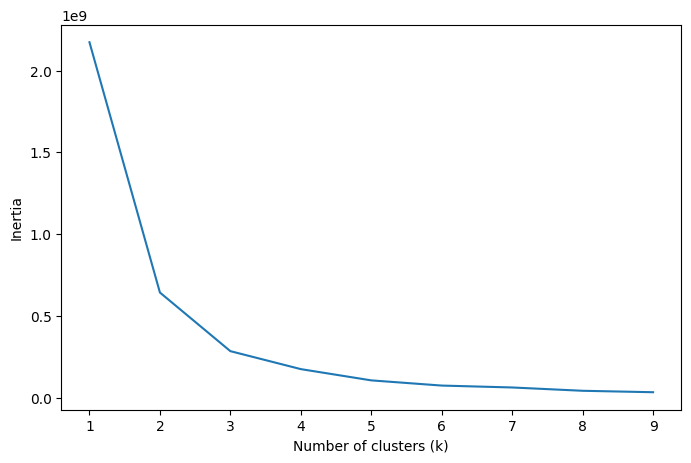

In [11]:
inertia = {}

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(recency[['inactive_days']])
    inertia[k] = km.inertia_

plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

In [12]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(recency[['inactive_days']])
recency['cluster'] = km.labels_
recency.head()

,customer_unique_id,inactive_days,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1
2,0000f46a3911fa3c0805444483337064,536,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,2
4,0004aac84e0df4da2b147fca70cf8255,287,2


In [13]:
recency.groupby('cluster')['inactive_days'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,30579.0,73.547402,42.503592,0.0,34.0,74.0,112.0,145.0
3,31274.0,217.005212,42.115814,146.0,181.0,216.0,258.0,286.0
2,18514.0,354.443070,40.803095,287.0,319.0,352.0,390.0,428.0
0,12990.0,502.071671,51.482657,429.0,461.0,492.0,536.0,694.0


In [15]:
# Renaming the clusters according to mean number of inactive_days
recency_cluster = recency.groupby('cluster')['inactive_days'].mean().reset_index()
recency_cluster = recency_cluster.sort_values(by='inactive_days', ascending=False).reset_index(drop=True)
recency_cluster['index'] = np.arange(0,4)
recency_cluster.set_index('cluster', inplace=True)
cluster_dict = recency_cluster['index'].to_dict()
recency['cluster'].replace(cluster_dict, inplace=True)
recency.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14572\3924849218.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recency['cluster'].replace(cluster_dict, inplace=True)


,customer_unique_id,inactive_days,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3
2,0000f46a3911fa3c0805444483337064,536,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1
4,0004aac84e0df4da2b147fca70cf8255,287,1


In [16]:
recency.groupby('cluster')['inactive_days'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
3,30579.0,73.547402,42.503592,0.0,34.0,74.0,112.0,145.0
2,31274.0,217.005212,42.115814,146.0,181.0,216.0,258.0,286.0
1,18514.0,354.443070,40.803095,287.0,319.0,352.0,390.0,428.0
0,12990.0,502.071671,51.482657,429.0,461.0,492.0,536.0,694.0


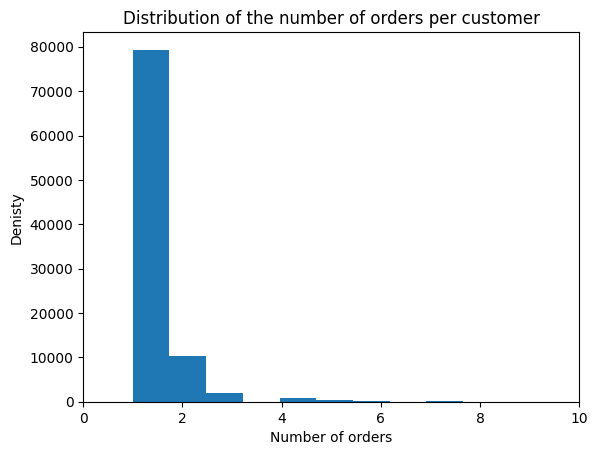

In [17]:
# Create a dataframe to store customers uuid and frequency scores
frequency = df[['customer_unique_id', 'order_id']].copy()

# Count the number of orders for each customer
frequency = frequency.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns = ['customer_unique_id', 'number_of_orders']

frequency['number_of_orders'].plot.hist(bins=100)
plt.xlim(0,10)
plt.xlabel('Number of orders')
plt.ylabel('Denisty')
plt.title('Distribution of the number of orders per customer');

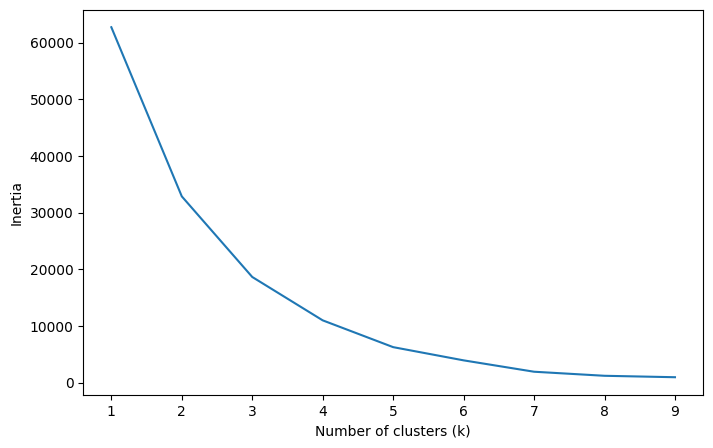

In [18]:
inertia = {}

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(frequency[['number_of_orders']])
    inertia[k] = km.inertia_

plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

In [19]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(frequency[['number_of_orders']])
frequency['cluster'] = km.labels_
frequency.groupby('cluster')['number_of_orders'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,79337.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3,10415.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
1,3103.0,3.481147,0.665694,3.0,3.0,3.0,4.0,5.0
2,502.0,8.099602,4.806645,6.0,6.0,6.0,8.0,75.0


In [20]:
# Renaming the clusters according the mean number_of_orders
frequency_cluster = frequency.groupby('cluster')['number_of_orders'].mean().reset_index()
frequency_cluster = frequency_cluster.sort_values(by='number_of_orders').reset_index(drop=True)
frequency_cluster['index'] = np.arange(0,4)
frequency_cluster.set_index('cluster', inplace=True)
cluster_dict = frequency_cluster['index'].to_dict()
frequency['cluster'].replace(cluster_dict, inplace=True)

frequency.groupby('cluster')['number_of_orders'].describe().sort_values(by='mean')

C:\Users\User\AppData\Local\Temp\ipykernel_14572\3866833097.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frequency['cluster'].replace(cluster_dict, inplace=True)


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,79337.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,10415.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,3103.0,3.481147,0.665694,3.0,3.0,3.0,4.0,5.0
3,502.0,8.099602,4.806645,6.0,6.0,6.0,8.0,75.0


C:\Users\User\AppData\Local\Temp\ipykernel_14572\109722075.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monetary['payment_value'], hist=False)


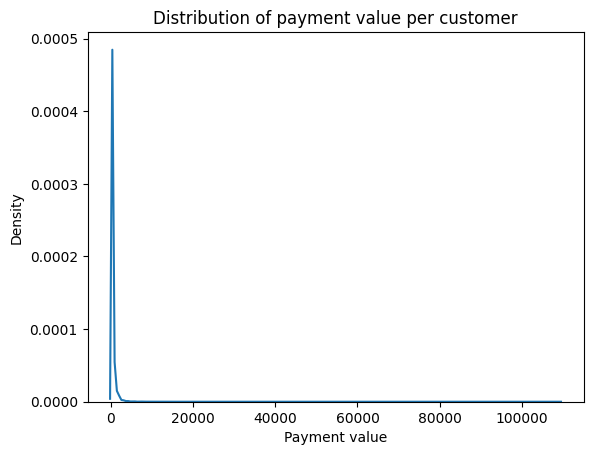

In [21]:
# Create a dataframe to store customer uuid and monetary scores
monetary = df[['customer_unique_id', 'payment_value']].copy()
# Total payment value per customer
monetary = monetary.groupby('customer_unique_id')['payment_value'].sum().reset_index()
sns.distplot(monetary['payment_value'], hist=False)
plt.xlabel('Payment value')
plt.ylabel('Density')
plt.title('Distribution of payment value per customer');

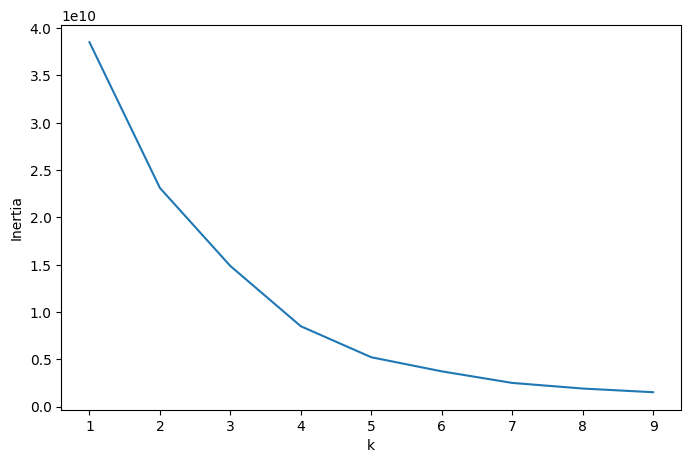

In [22]:
inertia = {}

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(monetary[['payment_value']])
    inertia[k] = km.inertia_
plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('k')
plt.ylabel('Inertia');

In [24]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(monetary[['payment_value']])
monetary['cluster'] = km.labels_
df= monetary
df.to_csv("KMeans_montary.csv", index=False)

In [25]:
monetary.groupby('cluster')['payment_value'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,92075.0,172.485052,190.123221,9.59,63.27,111.37,195.860,1401.85
3,1261.0,2633.825139,1651.695281,1404.41,1645.76,2027.65,2895.000,12490.88
1,20.0,23201.656000,9512.025508,14196.28,16880.72,19258.32,28226.475,45256.00
2,1.0,109312.640000,NaN,109312.64,109312.64,109312.64,109312.640,109312.64


In [26]:
# Renaming the clusters according to mean number of payment_value
monetary_cluster = monetary.groupby('cluster')['payment_value'].mean().reset_index()
monetary_cluster = monetary_cluster.sort_values(by='payment_value').reset_index(drop=True)
monetary_cluster['index'] = np.arange(0,4)
monetary_cluster.set_index('cluster', inplace=True)
cluster_dict = monetary_cluster['index'].to_dict()
monetary['cluster'].replace(cluster_dict, inplace=True)
monetary.groupby('cluster')['payment_value'].describe().sort_values(by='mean')

C:\Users\User\AppData\Local\Temp\ipykernel_14572\1836543647.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monetary['cluster'].replace(cluster_dict, inplace=True)


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,92075.0,172.485052,190.123221,9.59,63.27,111.37,195.860,1401.85
1,1261.0,2633.825139,1651.695281,1404.41,1645.76,2027.65,2895.000,12490.88
2,20.0,23201.656000,9512.025508,14196.28,16880.72,19258.32,28226.475,45256.00
3,1.0,109312.640000,NaN,109312.64,109312.64,109312.64,109312.640,109312.64


Overall score


In [28]:
# Merge recency, frequency and monetary dataframes together on customer uuid
overall = recency.merge(frequency, on='customer_unique_id')
overall = overall.merge(monetary, on='customer_unique_id')

# Rename cluster columns
overall.rename(columns={'cluster_x': 'recency_cluster',
                       'cluster_y': 'frequency_cluster',
                       'cluster': 'monetary_cluster'},
              inplace=True)

# Sum up the clusters to obtain the overall score
overall['overall_score'] = overall['recency_cluster'] + overall['frequency_cluster'] + overall['monetary_cluster']
overall.head()

,customer_unique_id,inactive_days,recency_cluster,number_of_orders,frequency_cluster,payment_value,monetary_cluster,overall_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3,1,0,141.90,0,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3,1,0,27.19,0,3
2,0000f46a3911fa3c0805444483337064,536,0,1,0,86.22,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,1,0,43.62,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,1,0,196.89,0,1


We have now assigned customers a score that ranges from 0 to 8, with 8 being Olist's most valuable customers. For simplicity, we will re-group these customers into 3 segments:

Scores 0 to 2: Low value


Scores 3 to 4: Mid value


Scores 5+: High value

In [29]:
overall['segment'] = overall['overall_score'].map(lambda x: 'low' if x < 3 else ('mid' if x < 5 else 'high'))

overall['segment'].value_counts()

segment
low     57095
mid     34648
high     1614
Name: count, dtype: int64

In [30]:
overall.head()

,customer_unique_id,inactive_days,recency_cluster,number_of_orders,frequency_cluster,payment_value,monetary_cluster,overall_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3,1,0,141.90,0,3,mid
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3,1,0,27.19,0,3,mid
2,0000f46a3911fa3c0805444483337064,536,0,1,0,86.22,0,0,low
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,1,0,43.62,0,1,low
4,0004aac84e0df4da2b147fca70cf8255,287,1,1,0,196.89,0,1,low


In [31]:
df = overall
df.to_csv("overall_kmeans_value.csv",index=False)

================================================================================================================================================

In [35]:
import pandas as pd

def load_data(file_path: str) -> pd.DataFrame:
    """Loads the dataset from a specified CSV file path.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded dataset.

    Raises:
        FileNotFoundError: If the specified file does not exist.
        pd.errors.EmptyDataError: If the file is empty.
        pd.errors.ParserError: If the file cannot be parsed as a CSV.
    """
    try:
        return pd.read_csv(file_path)
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        print(f"Error loading data: {e}")
        raise

def general_customer_info(data: pd.DataFrame) -> None:
    """Prints the number of unique and repeat customers in the dataset.
    
    Args:
        data (pd.DataFrame): The customer dataset containing customer information.
    """
    unique_customers = data['customer_unique_id'].nunique()
    repeat_customers = data['customer_unique_id'].value_counts().gt(1).sum()

    print(f"Number of unique customers: {unique_customers}")
    print(f"Number of repeat customers: {repeat_customers}")

def save_data(data: pd.DataFrame, output_path: str) -> None:
    """Saves the DataFrame to a specified CSV file path.

    Args:
        data (pd.DataFrame): The DataFrame to save.
        output_path (str): The path where the CSV will be saved.
    """
    data.to_csv(output_path, index=False)
    print(f"Data saved to {output_path}")

def main():
    file_path = r'D:\final project\Dataset\olist_customers_dataset.csv'
    
    # Load data
    olist_data = load_data(file_path)
    
    # Display customer information
    general_customer_info(olist_data)
    
    # Save processed data if needed
    output_path = r'D:\final project\Dataset\processed_olist_customers.csv'
    save_data(olist_data, output_path)

if __name__ == "__main__":
    main()

Number of unique customers: 96096
Number of repeat customers: 2997
Data saved to D:\final project\Dataset\processed_olist_customers.csv


In [37]:
df4= pd.read_csv(r'D:\final project\Dataset\olist_customers_dataset.csv')

def general_customer_info(data):
    """Returns the number of unique and repeat customers in the dataset."""
    
    # Calculate the number of unique customers
    unique_customers_count = data.customer_unique_id.nunique()
    
    # Calculate the number of repeat customers
    repeat_customers_count = (data.customer_unique_id.value_counts() > 1).sum()
    
    # Print the results
    print(f"Number of unique customers: {unique_customers_count}")
    print(f"Number of repeat customers: {repeat_customers_count}")

    return

# Call the function with the dataset
general_customer_info(df4)

df4

Number of unique customers: 96096
Number of repeat customers: 2997


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
general_customer_info(df4)
gf= general_customer_info(df4)
gf.to_cdv 


Number of unique customers: 96096
Number of repeat customers: 2997
